<a href="https://colab.research.google.com/github/KangnamUniv-ML/Titanic-ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip3 install kaggle

# Titanic 데이터 정보

| column | descript | val |
|--------|----------|-----|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	||
|Age	|Age in years| |
|sibsp	|# of siblings / spouses aboard the Titanic	| |
|parch	|# of parents / children aboard the Titanic	| |
|ticket	|Ticket number	| |
|fare	|Passenger fare	| |
|cabin	|Cabin number	| |
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

## 참고 레퍼런스

- [kaggle API 사용법](https://velog.io/@skyepodium/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95)

## python 라이브러리 import, 학습 데이터 다운로드

In [84]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 닉네임, 토큰 설정
# os.environ["KAGGLE_USERNAME"] = ''
# os.environ["KAGGLE_KEY"] = ""

# 데이터 받기, colab에서 리눅스 명령어를 사용할때는 앞에 !가 붙습니다.
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 6.85MB/s]


In [63]:
!unzip -o titanic.zip
!rm titanic.zip
!ls -al

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
total 144
drwxr-xr-x 7 jovyan users   224 May 20 03:56 .
drwsrwsr-x 1 jovyan users  4096 May 18 10:41 ..
-rw-r--r-- 1 jovyan users  3258 Dec 11  2019 gender_submission.csv
drwxr-xr-x 3 jovyan users    96 May 18 10:43 .ipynb_checkpoints
-rw-r--r-- 1 jovyan users 28629 Dec 11  2019 test.csv
-rw-r--r-- 1 jovyan users 42512 May 20 03:55 Titanic.ipynb
-rw-r--r-- 1 jovyan users 61194 Dec 11  2019 train.csv


## 학습 데이터 로드

In [64]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 자료 구조 파악

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
df.index

RangeIndex(start=0, stop=891, step=1)

- Null 데이터 확인

Age, Cabin, Embarked 컬럼이 null 값 존재

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`describe` 명령을 통해 데이터 간략 통계정보 확인

In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 전처리 작업 진행

전처리 목표

- Age 컬럼의 null 값 항목에 가능하면 평균값으로 채워 놓자 <-- 해당 row 를 삭제하기엔 데이터가 너무 적음
- Embarked 컬럼의 null 값 부분은 최빈값으로 채워놓자 <-- 해당 row 를 삭제하기엔 데이터가 너무 적음
- Name, Ticket, Cabin 컬럼은 의미도 없어 보이고 데이터도 많이 빠진것도 있으니 컬럼자체를 삭제하자
- sex, Embarked 컬럼은 `one hot encoding` 을 하거나 문자열 값을 숫자로 변환하자

### Age 컬럼의 null 값 항목에 가능하면 평균값으로 채워 놓자

In [70]:
df['Age'].mean()

29.69911764705882

[loc reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

`Age` 컬럼 중 null 인 부분만 골라낸 boolean array 값을 `loc`을 이용해 추출된 row 그룹을 반환

그 중 `Age` column 만 추출한 결과에 평균 값을 저장

In [71]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()

In [72]:
df['Age'].isnull().sum()

0

### Embarked 컬럼의 null 값 부분은 최빈값으로 채워놓자

[unique reference](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)

In [73]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

[mode reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)

최빈값은 검색한 결과 `S`로 확인 됨

In [74]:
df['Embarked'].mode()[0]

'S'

In [75]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].mode()[0]

In [76]:
df['Embarked'].isnull().sum()

0

`Age`, `Embarked`의 null 값을 처리했음을 확인할 수 있음

In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Name, Ticket, Cabin 컬럼은 의미도 없어 보이고 데이터도 많이 빠진것도 있으니 컬럼자체를 삭제하자

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Sex, Embarked 컬럼은 one hot encoding 을 하거나 문자열 값을 숫자로 변환하자

In [80]:
sexDummies = pd.get_dummies(df['Sex'])
embarkedDummies = pd.get_dummies(df['Embarked'])

In [81]:
sexDummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [82]:
embarkedDummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [83]:
df = pd.concat([df, sexDummies, embarkedDummies], axis=1)
df = df.drop(['Sex', 'Embarked'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 시각화

https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining

In [102]:
# len(df[(df['female'] == 1) & (df['Survived'] == 1)])

survivedGender = df[df['Survived'] == 1][['female', 'male']]
survivedGender.head()

,female,male
1,1,0
2,1,0
3,1,0
8,1,0
9,1,0


<AxesSubplot:>

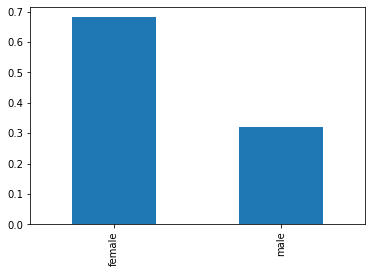

In [110]:
survivedGender.mean().plot(kind='bar')

In [ ]:
df.plot.bar(x='female', y='val', rot=0)

## kaggle 채점 요청

In [3]:
!kaggle competitions submit -c titanic -f gender_submission.csv -m "Subtit with Kaggle API"

100%|████████████████████████████████████████| 3.18k/3.18k [00:03<00:00, 822B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [17]:
#!pip3 list --format=freeze